# Linkedin Jobs Data Analysis in India

## Import Librarys :

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from IPython.display import Markdown, display
import plotly.express as px
import squarify

## Load Dataset :

In [2]:
df=pd.read_csv(r'C:\Users\malay bhuniaq\OneDrive\Desktop\Jupyter Notebook Project\All Projects\LinkedIn_Jobs_Data_India.csv')
df.head(2)

,Unnamed: 0,id,publishedAt,title,companyName,postedTime,applicationsCount,description,contractType,experienceLevel,workType,sector,companyId,city,state,recently_posted_jobs
0,0,3800928381,2024-01-09,Front-end Engineer/Web Developer (SDE 1 &amp; 2),BOX8,3 weeks ago,85.0,"Skill: html5 , ajax , oop , git , postgresql ,...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No
1,1,3800929078,2024-01-09,Android Developer-SDE 1 &amp; 2(Software Devel...,BOX8,3 weeks ago,80.0,"Skill: algorithms , rest , github , css , html...",Full-time,Entry level,Engineering and Information Technology,Staffing and Recruiting,3479477,Bengaluru,Karnataka,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            949 non-null    int64  
 1   id                    949 non-null    int64  
 2   publishedAt           857 non-null    object 
 3   title                 949 non-null    object 
 4   companyName           949 non-null    object 
 5   postedTime            949 non-null    object 
 6   applicationsCount     949 non-null    float64
 7   description           949 non-null    object 
 8   contractType          860 non-null    object 
 9   experienceLevel       949 non-null    object 
 10  workType              860 non-null    object 
 11  sector                860 non-null    object 
 12  companyId             949 non-null    int64  
 13  city                  949 non-null    object 
 14  state                 871 non-null    object 
 15  recently_posted_jobs  9

In [4]:
# Delete Unnamed column for this dataset
df = df.drop('Unnamed: 0', axis=1)

In [5]:
# Change the datatype float to int in the applicationCount column
df['applicationsCount']=df['applicationsCount'].astype('Int64')

In [6]:
# Change the datatype object to date in the publishedAt column
df['publishedAt']=pd.to_datetime(df['publishedAt'], errors='coerce', )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    949 non-null    int64         
 1   publishedAt           857 non-null    datetime64[ns]
 2   title                 949 non-null    object        
 3   companyName           949 non-null    object        
 4   postedTime            949 non-null    object        
 5   applicationsCount     949 non-null    Int64         
 6   description           949 non-null    object        
 7   contractType          860 non-null    object        
 8   experienceLevel       949 non-null    object        
 9   workType              860 non-null    object        
 10  sector                860 non-null    object        
 11  companyId             949 non-null    int64         
 12  city                  949 non-null    object        
 13  state               

In [7]:
print('✅ Shape of Dataset:', df.shape)
print('\n🔍 Columns Available:\n')
print(df.columns.tolist())

✅ Shape of Dataset: (949, 15)

🔍 Columns Available:

['id', 'publishedAt', 'title', 'companyName', 'postedTime', 'applicationsCount', 'description', 'contractType', 'experienceLevel', 'workType', 'sector', 'companyId', 'city', 'state', 'recently_posted_jobs']


## Chack Null values :

In [8]:
df.isnull().sum()

id                       0
publishedAt             92
title                    0
companyName              0
postedTime               0
applicationsCount        0
description              0
contractType            89
experienceLevel          0
workType                89
sector                  89
companyId                0
city                     0
state                   78
recently_posted_jobs     0
dtype: int64

## No. of Unique Title :

In [9]:
df['title'].value_counts()

title
Data Scientist                   47
Product Manager                  35
Business Development Manager     28
Content Writer                   22
Financial Analyst                20
                                 ..
Software Engineer, Core           1
Web developer                     1
Web Application Developer         1
SDE-I (Full-stack Developer)      1
Software Engineer - Fullstack     1
Name: count, Length: 495, dtype: int64

In [10]:
df['title'].nunique()

495

## Normalized all title :

In [11]:
# Create new column Normalized_title
df['normalized_title']= 'Others'

In [12]:
a1=df['title'].str.contains('Analyst', case=False, regex=True, na=False)
df.loc[a1, 'normalized_title'] = 'Analyst'

a2=df['title'].str.contains('Assistant', case=False, regex=True, na=False)
df.loc[a2, 'normalized_title'] = 'Assistant Manager'

b1=df['title'].str.contains('Business Development', case=False, regex=True, na=False)
df.loc[b1, 'normalized_title'] = 'Business Development'

d1=df['title'].str.contains('Data Science|Datascientist|Data Scientist', case=False, regex=True, na=False)
df.loc[d1, 'normalized_title'] = 'Data Scientist'

d2=df['title'].str.contains('Digital Marketing', case=False, regex=True, na=False)
df.loc[d2, 'normalized_title'] = 'Digital Marketing'

f1=df['title'].str.contains('Financial Planning', case=False, regex=True, na=False)
df.loc[f1, 'normalized_title'] = 'Financial Planning and Analysis'

h1=df['title'].str.contains('Human Resources', case=False, regex=True, na=False)
df.loc[h1, 'normalized_title'] = 'Human Resources'

h2=df['title'].str.contains('HR|Human Resource', case=False, regex=True, na=False)
df.loc[h2, 'normalized_title'] = 'HR'

m1=df['title'].str.contains('Mechanical', case=False, regex=True, na=False)
df.loc[m1, 'normalized_title'] = 'Mechanical Engineer'

m2=df['title'].str.contains('Machine Learning|ML', case=False, regex=True, na=False)
df.loc[m2, 'normalized_title'] = 'Machine Learning Engineer'

s1=df['title'].str.contains('Software Engineer', case=False, regex=True, na=False)
df.loc[s1, 'normalized_title'] = 'Software Engineer'

s2=df['title'].str.contains('Software Developer|Software Development', case=False, regex=True, na=False)
df.loc[s2, 'normalized_title'] = 'Software Developer'

s3=df['title'].str.contains('Social Media', case=False, regex=True, na=False)
df.loc[s3, 'normalized_title'] = 'Social Media'

s4=df['title'].str.contains('Senior Product Manager| Senior Manager', case=False, regex=True, na=False)
df.loc[s4, 'normalized_title'] = 'Senior manager'

w1=df['title'].str.contains('Writers|Writer|Writing|Copywriter', case=False, regex=True, na=False)
df.loc[w1, 'normalized_title'] = 'Writers'

w2=df['title'].str.contains('Web ', case=False, regex=True, na=False)
df.loc[w2, 'normalized_title'] = 'Web Developer'

In [13]:
df['normalized_title'].value_counts()

normalized_title
Others                             222
HR                                  96
Analyst                             92
Business Development                92
Data Scientist                      76
Writers                             73
Mechanical Engineer                 64
Software Engineer                   49
Social Media                        40
Assistant Manager                   36
Machine Learning Engineer           33
Web Developer                       26
Digital Marketing                   18
Software Developer                  14
Senior manager                      10
Financial Planning and Analysis      8
Name: count, dtype: int64

# :) Data cleaning & visualization :
## :) Showing 12 insights

## 1. Top 10 Most In-Demand Job Titles in India

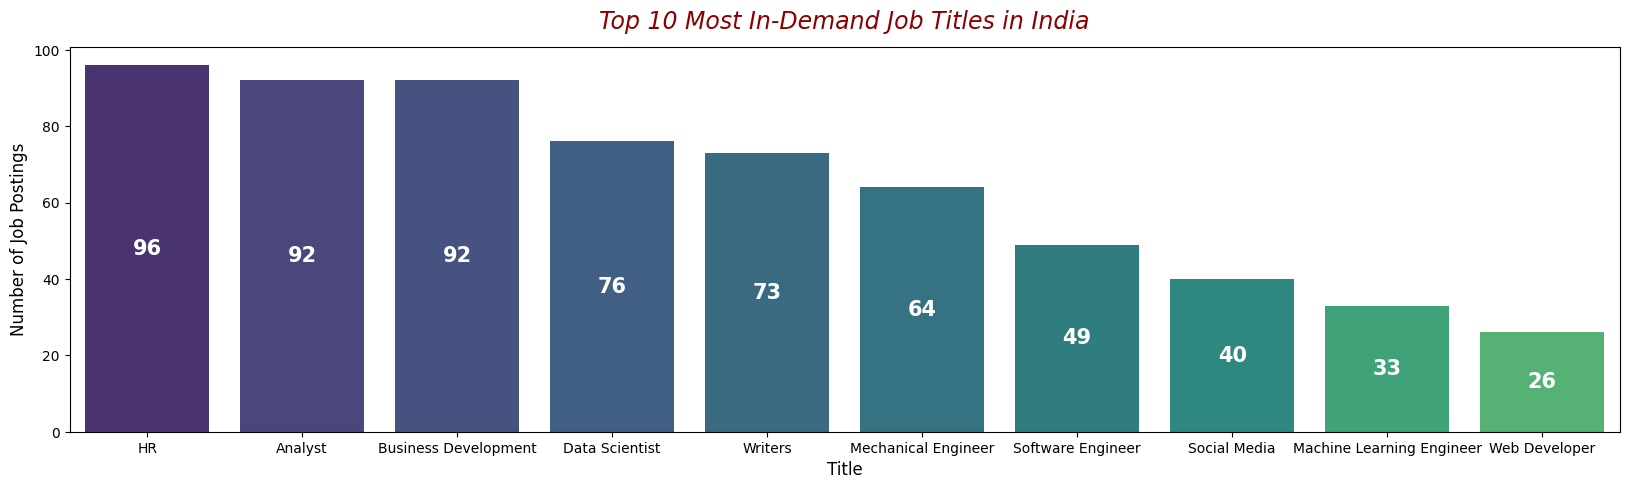

***📊Key Insight :** HR and Analyst roles lead job demand in India, followed by strong hiring for software, data science, and AI-related positions.*

In [14]:
title = df['normalized_title'].value_counts()
title_orders=['HR','Analyst','Business Development','Data Scientist','Writers','Mechanical Engineer','Software Engineer','Social Media','Machine Learning Engineer','Web Developer']
plt.figure(figsize=(20,5))
temp = sns.barplot(x=title.index, y=title.values, hue=title.index, palette='viridis', order=title_orders)
plt.xlabel('Title',fontsize=12)
plt.ylabel('Number of Job Postings',fontsize=12)
plt.title('Top 10 Most In-Demand Job Titles in India',fontsize=17,color='darkred',fontstyle='italic',pad=13)

for value in temp.containers:
    temp.bar_label(value, label_type='center',fontsize=15,color='white',fontweight='bold')
    
plt.show()
display(Markdown('***📊Key Insight :** HR and Analyst roles lead job demand in India, followed by strong hiring for software, data science, and AI-related positions.*'))

## 2. Which job titles receive the highest number of applications, indicating the most competitive roles?

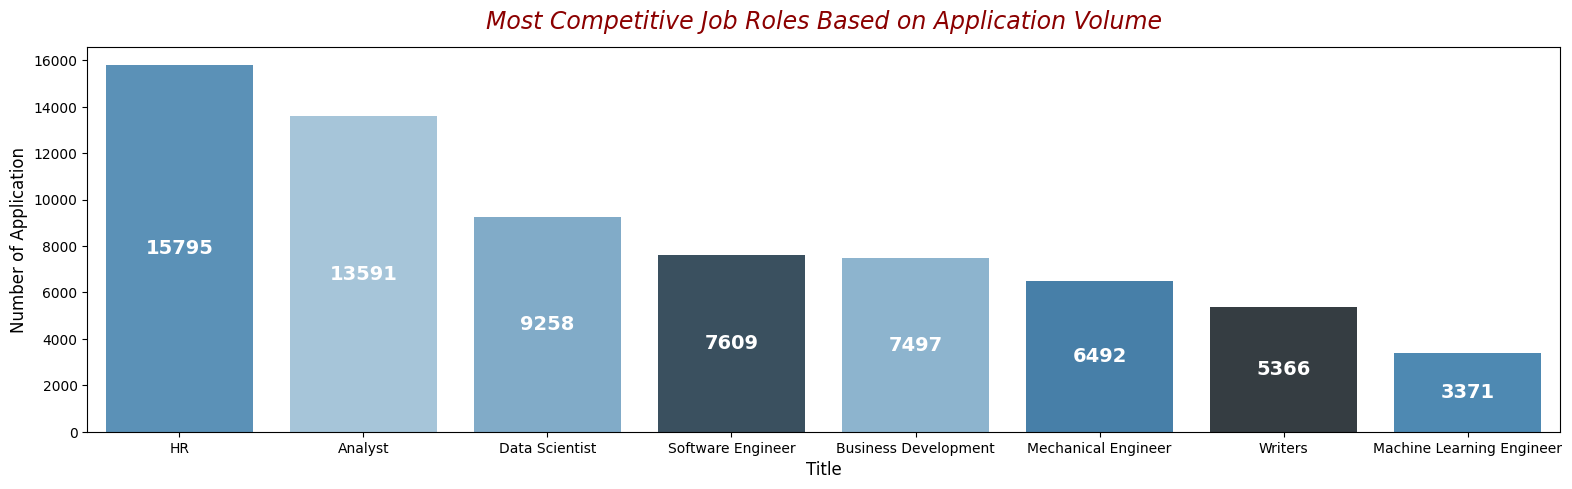

***📊Key Insight :** HR and Analyst roles attract the highest number of applications, indicating intense competition in these positions. Data Scientist and Software Engineer roles also receive strong applicant interest, while Mechanical Engineer, Writers, and Machine Learning Engineer roles show comparatively lower application volumes.*

In [15]:
title = df.groupby('normalized_title')['applicationsCount'].sum()
title_orders=['HR','Analyst','Data Scientist','Software Engineer','Business Development','Mechanical Engineer','Writers','Machine Learning Engineer']
plt.figure(figsize=(19,5))
temp = sns.barplot(x=title.index, y=title.values, hue=title.index, palette='Blues_d', order=title_orders)
plt.xlabel('Title',fontsize=12)
plt.ylabel('Number of Application',fontsize=12)
plt.title('Most Competitive Job Roles Based on Application Volume',fontsize=17,color='darkred',fontstyle='italic',pad=13)

for value in temp.containers:
    temp.bar_label(value, label_type='center',fontsize=14,color='white',fontweight='bold')    
plt.show()
display(Markdown('***📊Key Insight :** HR and Analyst roles attract the highest number of applications, indicating intense competition in these positions. Data Scientist and Software Engineer roles also receive strong applicant interest, while Mechanical Engineer, Writers, and Machine Learning Engineer roles show comparatively lower application volumes.*'))

## 3. Which job titles attract the highest average applications?

In [93]:
title = df.groupby('normalized_title')['applicationsCount'].mean().round(2).sort_values(ascending=False).head(10)
title= title.reset_index(name='Avg Applications')
title.head(5)

,normalized_title,Avg Applications
0,HR,164.53
1,Senior manager,158.1
2,Software Engineer,155.29
3,Analyst,147.73
4,Financial Planning and Analysis,147.5


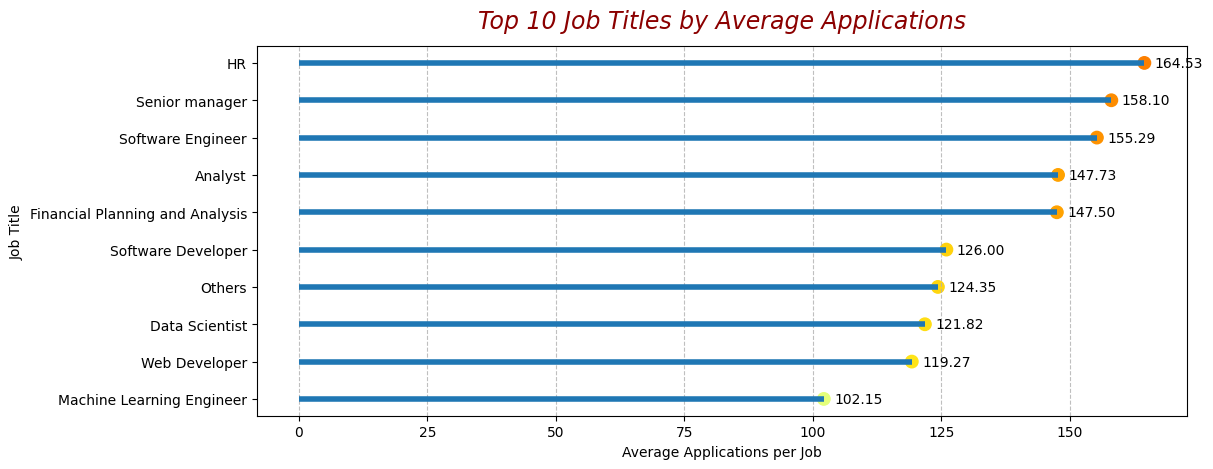

***📊Key Insight :** Job titles at the top receive significantly higher average applications, indicating strong candidate demand and intense competition for these roles compared to others.*

In [114]:
plt.figure(figsize=(12,4.8))
plt.hlines(y=title['normalized_title'], xmin=0, xmax=title['Avg Applications'], linewidth=4) # Lines
plt.scatter(title['Avg Applications'],title['normalized_title'],c=title['Avg Applications'],cmap='Wistia',s=80) # Dots with color mapped to value
plt.xlabel("Average Applications per Job",fontsize=10)
plt.ylabel("Job Title",fontsize=10)
plt.title("Top 10 Job Titles by Average Applications",fontsize=17,color='darkred',fontstyle='italic',pad=13)
# Add Value labels
for x, y in zip(title['Avg Applications'], title['normalized_title']):
    plt.text(x + 2, y, f"{x:.2f}", va='center', fontsize=10)
plt.gca().invert_yaxis() # highest value appears at the top
plt.grid(axis='x', linestyle='--', alpha=0.8)
plt.show()
display(Markdown('***📊Key Insight :** Job titles at the top receive significantly higher average applications, indicating strong candidate demand and intense competition for these roles compared to others.*'))

## 4. How do monthly job posting trends vary across different years as shown in a year-wise line subplot?

In [16]:
# Extract Year and Month in the PublishedAt column
df['Year']=df['publishedAt'].dt.year.astype('Int64')
df['Month']=df['publishedAt'].dt.strftime('%b') # Extract month short format linke jan, feb, etc
# Create 2023 and 2024 dataframe
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data_2023 = df[df['Year']==2023]['Month'].value_counts().reindex(month_order)
data_2024 = df[df['Year']==2024]['Month'].value_counts().reindex(month_order)

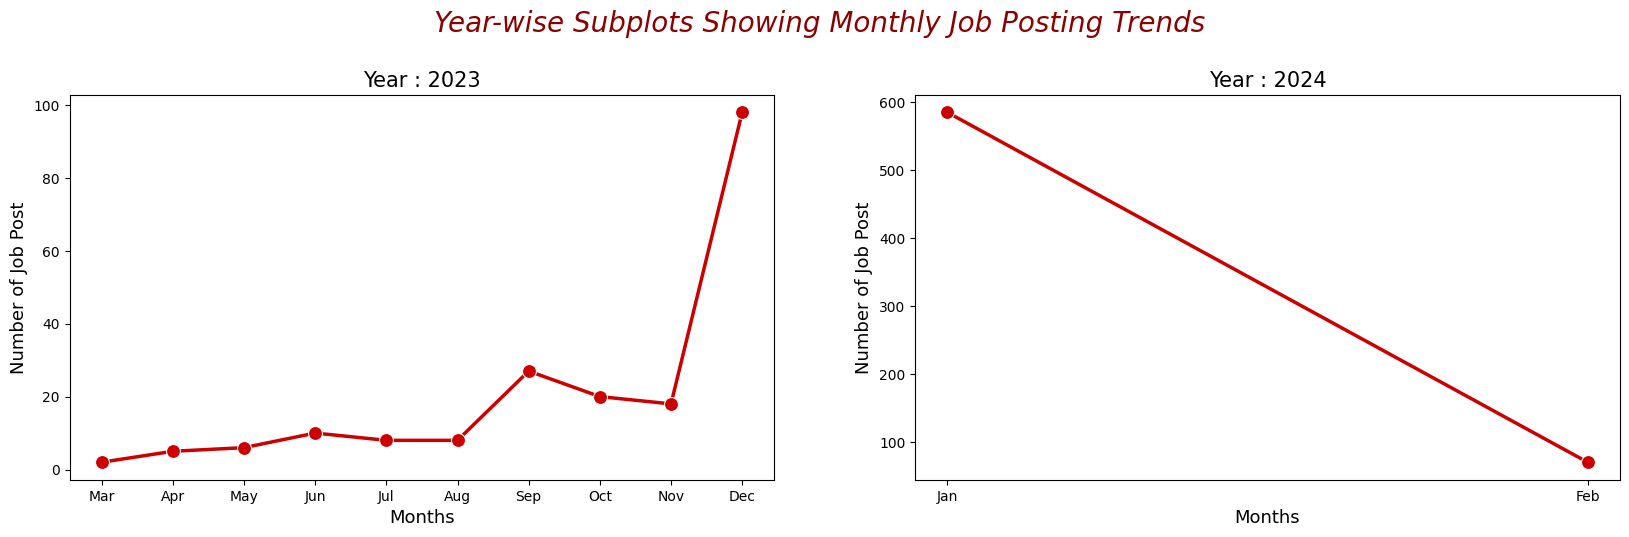

In [17]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.lineplot(x=data_2023.index, y=data_2023.values, marker='o', markersize=10, linewidth=2.5, color='#cc0000')
plt.xlabel('Months',fontsize=13)
plt.ylabel('Number of Job Post',fontsize=13)
plt.title('Year : 2023',fontsize=15)

plt.subplot(1,2,2)
sns.lineplot(x=data_2024.index, y=data_2024.values, marker='o', markersize=10, linewidth=2.5, color='#cc0000')
plt.xlabel('Months',fontsize=13)
plt.ylabel('Number of Job Post',fontsize=13)
plt.title('Year : 2024',fontsize=15)

plt.suptitle('Year-wise Subplots Showing Monthly Job Posting Trends',fontsize=20, color='darkred',fontstyle='italic',y=1.05)
plt.show()

## 5. How does application demand vary by experience level for Analyst and Data Scientist roles across different years?

In [18]:
# Extract Analyst and data Scientist records
analyst_scientist = df[df['normalized_title'].isin(['Analyst','Data Scientist'])]
a_s=analyst_scientist.groupby(['normalized_title','experienceLevel','Year'])['applicationsCount'].sum().reset_index(name='Count')

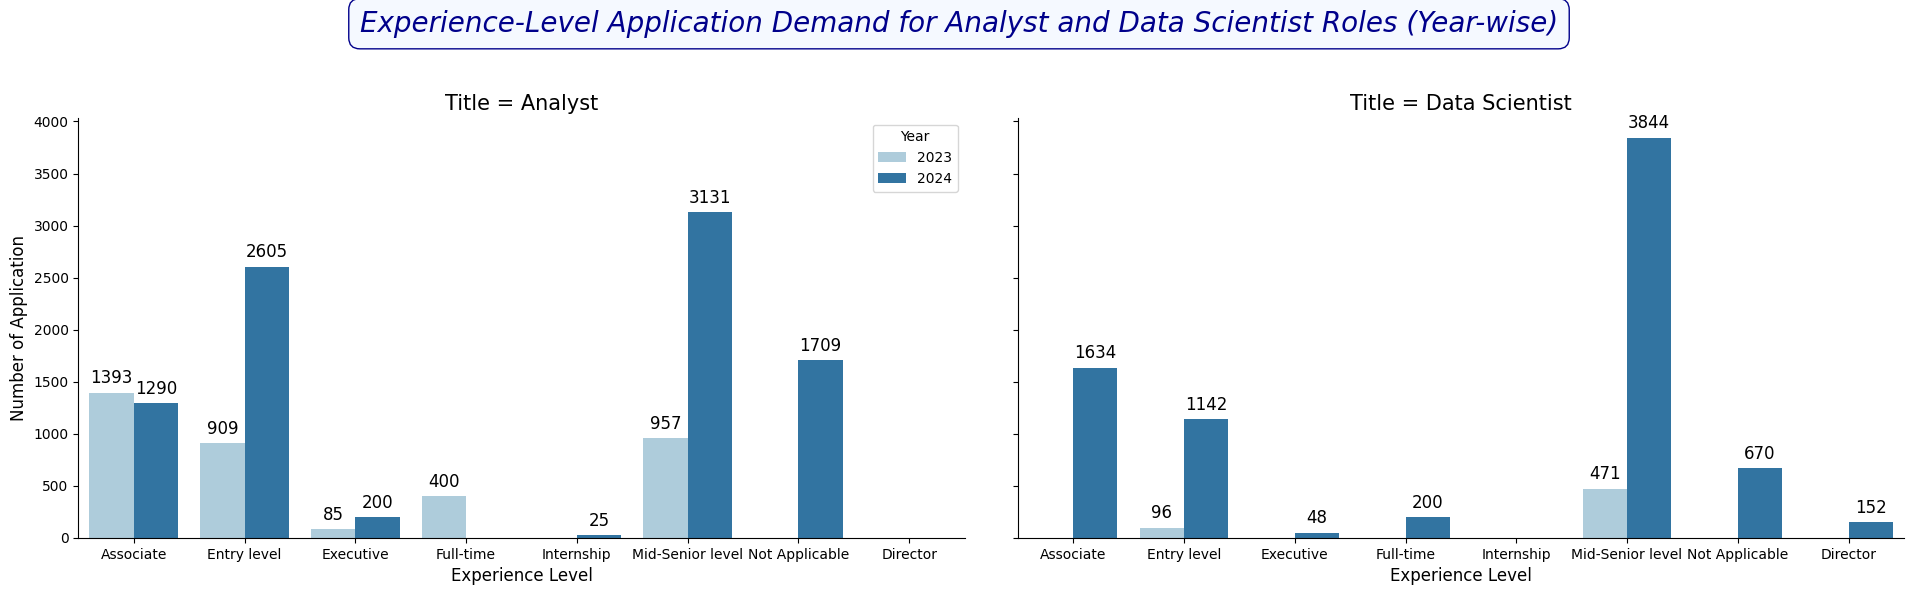

*📊**Key Insight:** *Mid-Senior level* positions receive the highest number of applications for both Analyst and Data Scientist roles across years, indicating peak competition at this experience level and **Internship demand is noticeably lower than full-time roles.***

In [19]:
temp = sns.catplot(x=a_s['experienceLevel'], y=a_s['Count'],col=a_s['normalized_title'], hue=a_s['Year'], kind='bar', height=6, aspect=1.6, legend_out=False,palette='Paired')
temp.set_titles(col_template='Title = {col_name}', size=15)
temp.fig.subplots_adjust(hspace=0.3, wspace=0.06, top=0.8, bottom=0.1)
temp.set_axis_labels('Experience Level','Number of Application',fontsize=12)
temp.fig.suptitle('Experience-Level Application Demand for Analyst and Data Scientist Roles (Year-wise)',fontsize=20,color='darkblue',fontstyle='italic',bbox=dict(facecolor='#f5f9ff', edgecolor='darkblue', boxstyle='round,pad=0.4'))
for ax in temp.axes.flat:
    for container in ax.containers:
        ax.bar_label(container,fontsize=12,color='black',padding=4)
plt.show()
display(Markdown('*📊**Key Insight:** *Mid-Senior level* positions receive the highest number of applications for both Analyst and Data Scientist roles across years, indicating peak competition at this experience level and **Internship demand is noticeably lower than full-time roles.***'))

## 6. How are Tech and Non-Tech companies distributed across the top 10 states in India?

####  :) Search Tech and Non-tech company's and create a new column Company_type

In [20]:
tech_keywords = ['tech','software','data','ai','analytics','cloud','digital','systems','infotech','it','labs','solutions','technologies']
# I use Two Columns for search Tech Keywords
df['Company_type'] = (
    df['companyName'].str.lower().str.contains('|'.join(tech_keywords), na=False) |  # str.contains() does not accept a list; 
    df['normalized_title'].str.lower().str.contains('|'.join(tech_keywords), na=False) # you must convert the list into a regex string using '|'.join()
).map({True:'Tech',False:'Non-Tech'})
# Showing Total Number of Tech and Non-Tech company's
df['Company_type'].value_counts().reset_index(name='Count')

,Company_type,Count
0,Non-Tech,537
1,Tech,412


In [21]:
state = df.groupby('state')['Company_type'].value_counts().reset_index(name='count')
pivot_t = state.pivot(index='state',columns='Company_type',values='count').fillna(0).astype(int)
pivot_t['Total']=pivot_t.sum(axis=1)
Top10_state = pivot_t.sort_values(by='Total',ascending=False).head(10)
Top10_state.columns = Top10_state.columns.str.strip() # strip() removes extra spaces from the start and end of text
# Convert to Long format
plotDF = Top10_state.reset_index().melt(id_vars='state', value_name='count', var_name='Company_type', value_vars=['Non-Tech','Tech'])
Top10_state.head(5)

Company_type,Non-Tech,Tech,Total
state,,,
Karnataka,126,119,245
Maharashtra,111,104,215
Haryana,58,38,96
Telangana,30,30,60
Uttar Pradesh,29,19,48


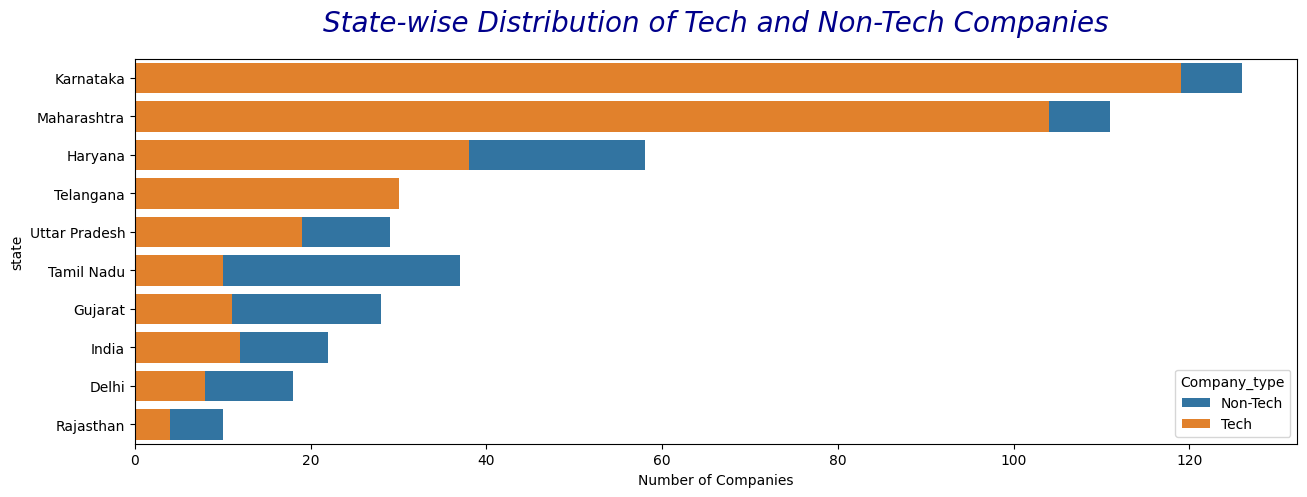

*📊**Key Insight:** Non-Tech companies dominate across most states in India, indicating a larger presence of traditional industries compared to technology-focused firms.*

In [22]:
plt.figure(figsize=(15,5))
sns.barplot(x='count',y='state',hue='Company_type',data=plotDF,dodge=False)
plt.title('State-wise Distribution of Tech and Non-Tech Companies',fontsize=20, color='darkblue',fontstyle='italic',y=1.05)
plt.xlabel('Number of Companies')
plt.show()
display(Markdown("*📊**Key Insight:** Non-Tech companies dominate across most states in India, indicating a larger presence of traditional industries compared to technology-focused firms.*"))

## 7. What are the top job titles driving hiring demand across major cities?

In [23]:
# group By city
city_title = df.groupby(['city','normalized_title']).size().reset_index(name='Count')
# Get max job title per city
max_rows = city_title.loc[city_title.groupby('city')['Count'].idxmax()].reset_index(drop=True)
# Not use Other job title name
max_rows=max_rows[max_rows['normalized_title']!='Others']
# Fetch top 10 city 
Top10_city = max_rows.sort_values(by='Count', ascending=False).head(10)
Top10_city.head(5)

,city,normalized_title,Count
70,Mumbai,Analyst,24
41,Gurugram,Analyst,12
22,Chennai,Mechanical Engineer,10
47,India,Business Development,7
80,Noida,Business Development,7


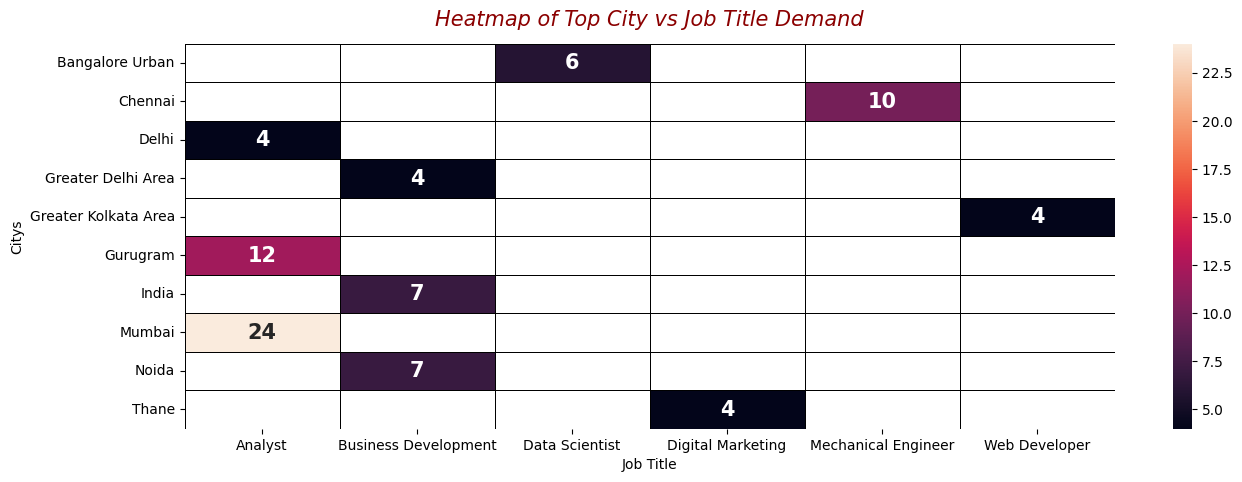

In [24]:
# Create Pivot table 
pivot_table=Top10_city.pivot(index='city',columns='normalized_title',values='Count')
# heatmap visualization
plt.figure(figsize=(15,5))
sns.heatmap(pivot_table, annot=True, fmt='.0f', linewidths=0.4, linecolor='black', annot_kws=dict(size=15,weight='bold'))
plt.xlabel('Job Title')
plt.ylabel('Citys')
plt.title('Heatmap of Top City vs Job Title Demand',fontsize=15,color='darkred',fontstyle='italic',pad=13)
plt.show()

## 8. How do the top 10 companies differ in terms of recently posted (Yes) versus non-recent (No) job postings?

In [25]:
# Extract Top 10 Company name
Top10_company = df['companyName'].value_counts().head(10).index
# Create new table of Top 10 Company name
Top10_com_records = df[df['companyName'].isin(Top10_company)].copy()
# Extract main brand name:
Top10_com_records['company_short'] = (Top10_com_records['companyName'].str.split(',').str[0])
# Show Top 5 Company
c_name = Top10_com_records['company_short'].value_counts().reset_index().head(5)
c_name.columns=['Company Name','Total Jobs']
c_name

,Company Name,Total Jobs
0,Tata Cummins,20
1,Freshworks,17
2,Google,12
3,Aditya Birla Capital,11
4,Dubai Jobs,11


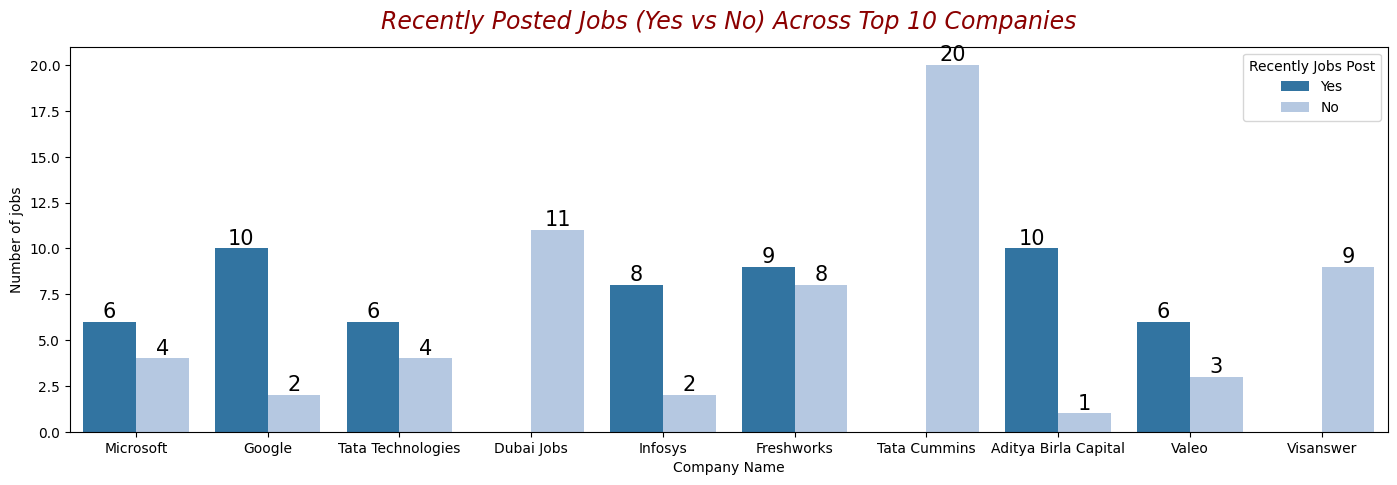

In [26]:
plt.figure(figsize=(17,5))
temp = sns.countplot(x='company_short', hue='recently_posted_jobs',data=Top10_com_records,palette='tab20')
plt.xlabel('Company Name')
plt.ylabel('Number of jobs')
plt.title('Recently Posted Jobs (Yes vs No) Across Top 10 Companies',fontsize=17,color='darkred',fontstyle='italic',pad=13)
# Change HUE name
temp.legend(title='Recently Jobs Post')

for container in temp.containers:
    temp.bar_label(container, label_type='edge', fontsize=15, color='black')
plt.show()

## 9. Which experience levels receive the highest number of applications among the top 10 companies by total applications?

In [27]:
# Find out the top 10 companies with the highest number of applications.
top10 = df.groupby('companyName')['applicationsCount'].sum().sort_values(ascending=False).head(10).index
top10_records = df[df['companyName'].isin(top10)].copy()
top10_records['Companys']= (top10_records['companyName'].str.split(',').str[0])
# Groupby company name and experience with applicationCount
temp= top10_records.groupby(['Companys','experienceLevel'])['applicationsCount'].sum().reset_index()
# Showing Company_name and Total_job_posts and Total_application
result=top10_records.groupby('Companys').agg(
    Jobs_Post = ('Companys','size'),
    Total_Applications = ('applicationsCount','sum')
).reset_index().sort_values(by='Total_Applications', ascending=False)
result

,Companys,Jobs_Post,Total_Applications
1,Freshworks,17,2529
3,Infosys,10,1834
9,Valeo,9,1587
0,Dubai Jobs,11,1585
2,Google,12,1562
4,LTIMindtree,9,1336
7,Tata Cummins,20,1316
8,Tata Technologies,10,1308
5,LinkedIn,6,1200
6,Paytm,5,1000


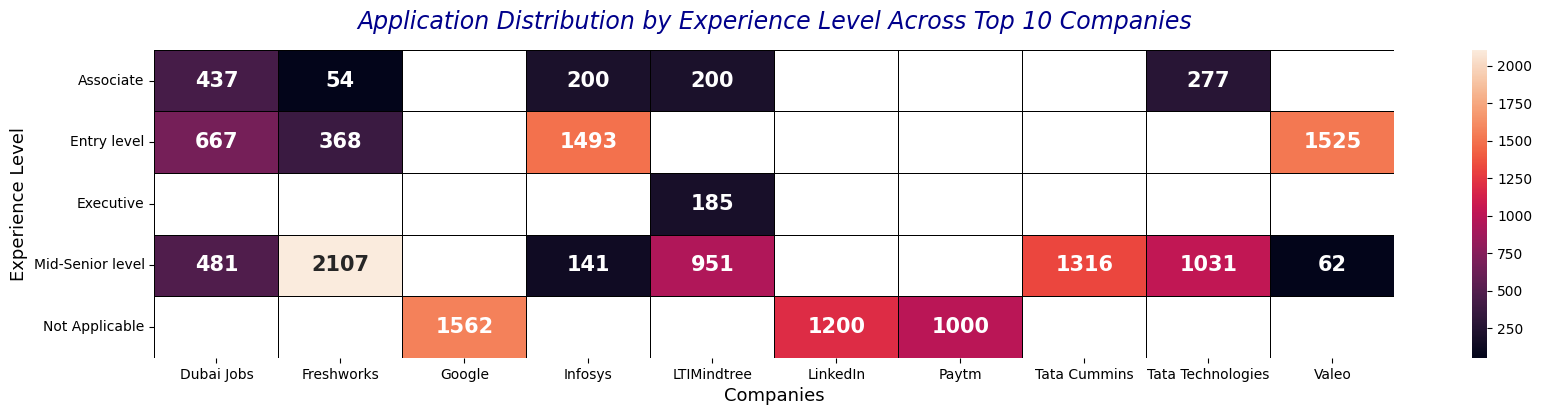

*📊**Key Insight:** Mid-level experience roles attract the highest applications Across most top companies, Mid / 2–5 years experience levels show the strongest application volumes.*

In [28]:
table=temp.pivot(index='experienceLevel',columns='Companys',values='applicationsCount').fillna(0).astype(int) # Replace NA to 0
table_nan = table.replace(0, np.nan) # Replace 0 to NaN
plt.figure(figsize=(20,4))
sns.heatmap(table_nan, annot=True, fmt='.0f', linewidths=0.4, linecolor='black',annot_kws=dict(size=15,weight='bold'))  
plt.title('Application Distribution by Experience Level Across Top 10 Companies',fontsize=17,color='darkblue',fontstyle='italic',pad=15)
plt.xlabel('Companies',fontsize=13)
plt.ylabel('Experience Level',fontsize=13)
plt.show()
display(Markdown("*📊**Key Insight:** Mid-level experience roles attract the highest applications Across most top companies, Mid / 2–5 years experience levels show the strongest application volumes.*"))

## 10. Get the top 6 Sector with the most companies

### **clean Sector column

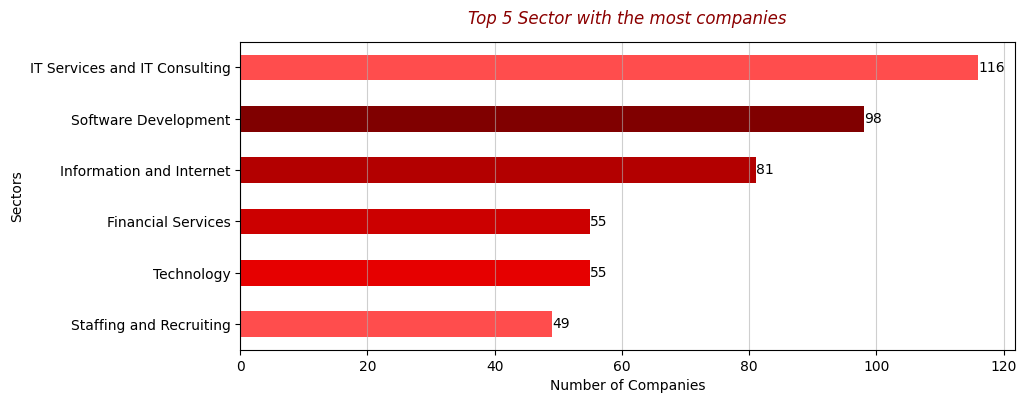

*📊**Key Insight:** The job market is strongly dominated by IT Services and Software-driven sectors, with IT Consulting and Software Development hosting the highest number of companies, highlighting continued demand for digital and technology-focused skills.*

In [115]:
# Create a new column sector_clean 
df['sector_clean'] = df['sector'].str.split(', ')
df_exploded = df.explode('sector_clean')
top5sector=df_exploded['sector_clean'].value_counts().head(6).sort_values(ascending=True)

plt.figure(figsize=(10,4))
bar_colors = ['#ff4d4d','#e60000','#cc0000', '#b30000','#800000']
bars = top5sector.plot(kind='barh', color=bar_colors)
plt.xlabel('Number of Companies')
plt.ylabel('Sectors')
plt.title('Top 5 Sector with the most companies',color='darkred',fontstyle='italic',pad=13)
plt.grid(axis='x',linestyle='-', alpha=0.6)

for bar in bars.containers:
    bars.bar_label(bar)
plt.show()
display(Markdown("*📊**Key Insight:** The job market is strongly dominated by IT Services and Software-driven sectors, with IT Consulting and Software Development hosting the highest number of companies, highlighting continued demand for digital and technology-focused skills.*"))

## 11. Which experience level faces the highest competition based on number of applications?

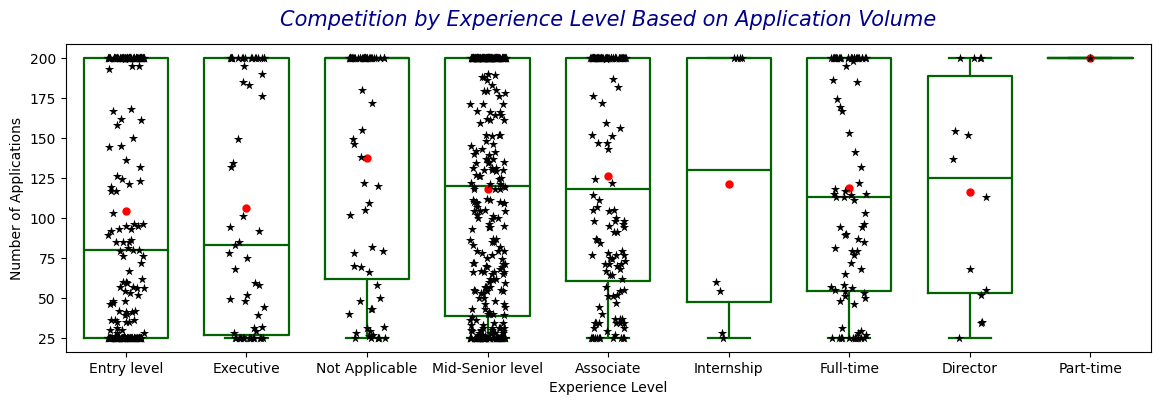

*📊**Key Insight:** Based on average application volume, Part-time and Not Applicable experience-level roles face the highest competition, each receiving around 200 applications per job.*

In [30]:
plt.figure(figsize=(14,4))
sns.boxplot(data=df,x='experienceLevel',y='applicationsCount',width=0.7,fill=False, color='darkgreen',showmeans=True,linewidth=1.6,
           meanprops={'marker':'o','markersize':5,'markeredgecolor':'red','markerfacecolor':'red'})

sns.stripplot(data=df,x='experienceLevel',y='applicationsCount',alpha=1, jitter=0.15, marker='*', s=7, color='black')
plt.xlabel('Experience Level',fontsize=10)
plt.ylabel('Number of Applications',fontsize=10)
plt.title('Competition by Experience Level Based on Application Volume',fontsize=15,color='darkblue',fontstyle='italic',pad=13)
plt.show()

display(Markdown("*📊**Key Insight:** Based on average application volume, Part-time and Not Applicable experience-level roles face the highest competition, each receiving around 200 applications per job.*"))

## 12. How does experience-level hiring differ across major industry sectors?

In [31]:
# Create Separate row sector_clean column list data
df_exploded = df.explode('sector_clean')
# Return top6 sector names
top6sector=df_exploded['sector_clean'].value_counts().head(6).index
# Create Top 6 sector table
top6sector_table=df_exploded[df_exploded['sector_clean'].isin(top6sector)].copy()
# Replace long experienceLevel name to short name
top6sector_table['short_experience']=top6sector_table['experienceLevel'].replace({
    'Entry level':'Entry','Executive':'Executive','Not Applicable':'NA','Mid-Senior level':'Mid-Senior',
    'Associate':'Associate','Internship':'Intern','Full-time':'Full-time','Director':'Director','Part-time':'Part-time'})
# Then Grouping Sector and Experience Level column
data = top6sector_table.groupby(['sector_clean','short_experience']).size().reset_index(name='count')

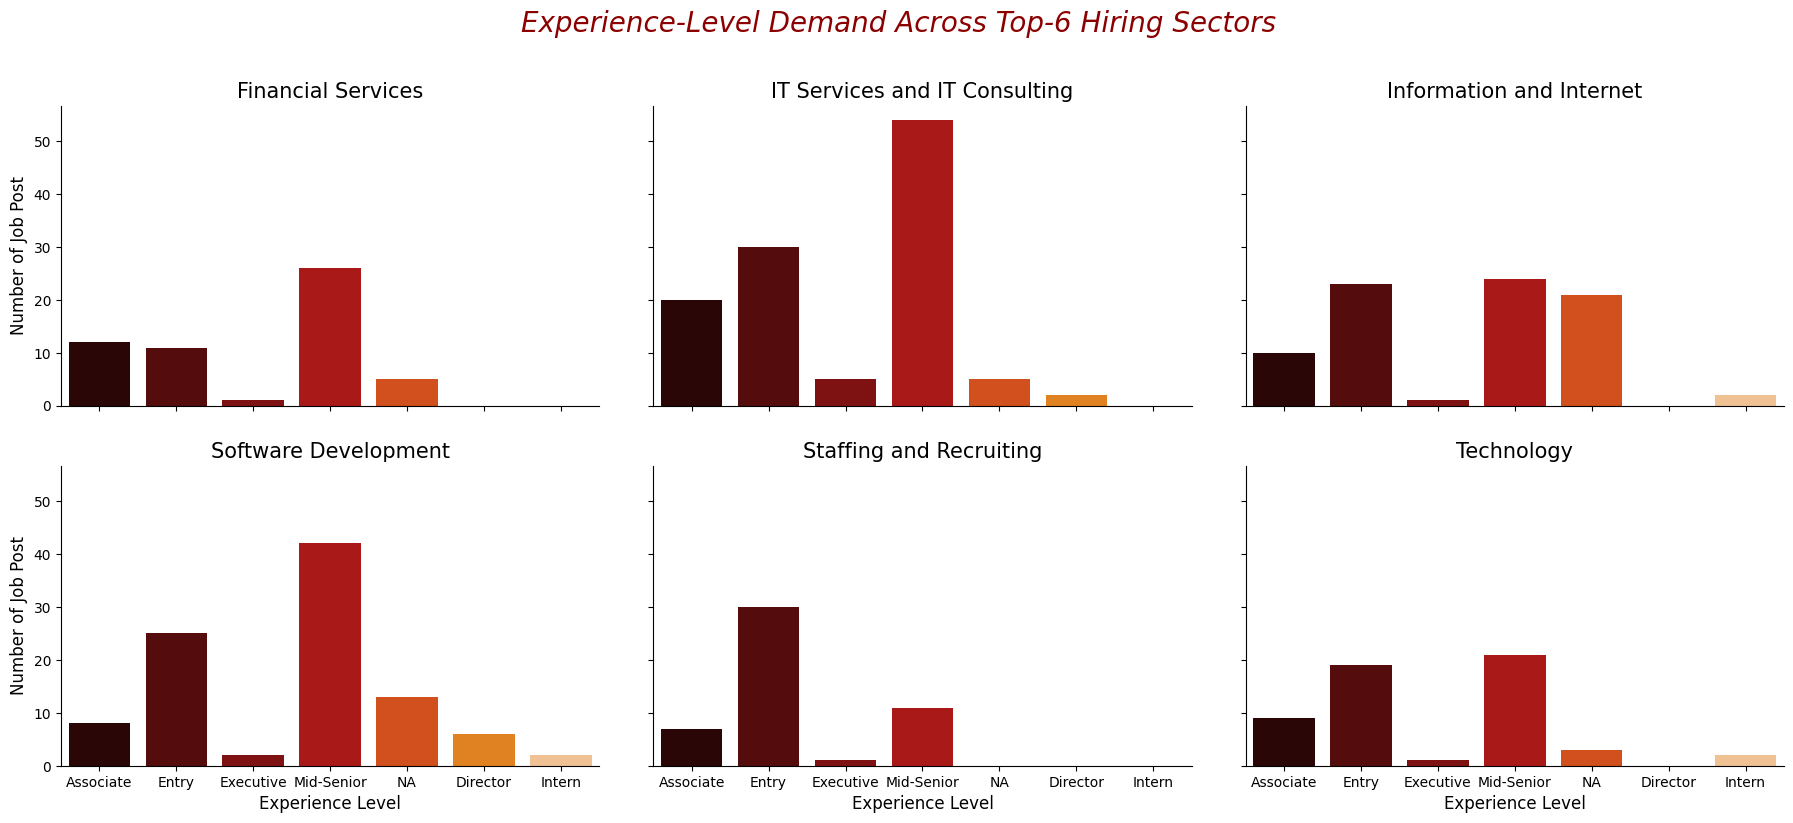

*📊**Key Insight:** The chart shows that **Mid-Senior level** experience is most in demand across leading industry sectors.*

In [32]:
# This 6 Sector showing in a categorical plot 
temp = sns.catplot(x=data['short_experience'], y=data['count'], data=data, col=data['sector_clean'], hue=data['short_experience'],
            palette='gist_heat', col_wrap=3, aspect=1, height=6, kind='bar')

temp.set_titles(col_template='{col_name}', size=15)
temp.fig.subplots_adjust(hspace=0.2,wspace=0.1,top=0.9,bottom=0.35)
temp.set_axis_labels('Experience Level','Number of Job Post',fontsize=12)
temp.fig.suptitle('Experience-Level Demand Across Top-6 Hiring Sectors',fontsize=20,color='darkred',fontstyle='italic')
plt.show()
display(Markdown('*📊**Key Insight:** The chart shows that **Mid-Senior level** experience is most in demand across leading industry sectors.*'))